# Thesis Outcomes

In this notebook I will compare the result I got from all the algorithms I implemented. 

I will start by comparing both packing methods with each other. Then i will be comparing the Mean, followed by the Inner Product, and finish with the Variance.

For all the algorithms I am working with vector of size n = 8192 which are always filled with exactly 8192 values which can be 1, 2 or 3.

## Setup

In [2]:
# Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Function to extract files from folder
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
            files = glob.glob(os.path.join(root, '*.csv'))
            for f in files:
                    all_files.append(os.path.abspath(f))
    return all_files

In [4]:
# Get file names
outcomes_CSV = get_files("../timeCSVs")

# Import csv as a Dataframe
print(outcomes_CSV[2])
mean_DF = pd.read_csv(outcomes_CSV[2])

c:\Users\berna\Desktop\Personal\FEUP\Thesis\Project\HE_Optimization\Outcomes\timeCSVs\mean.csv


In [5]:
# Auxiliary Functions

def compare_two_types_by_percentage(column1, column2, df):
    return ((df.loc[df['Type'] == column2]['Average'].values[0] - df.loc[df['Type'] == column1]['Average'].values[0] )/ df.loc[df['Type'] == column2]['Average'].values[0]) * 100

def create_df_for_type(type, setup_averages, encryption_averages, homomorphic_averages):
    df = pd.DataFrame(columns=['Time'], index=['Setup', 'Encryption', 'Homomorphic'])

    df.loc['Setup'] = float(format(setup_averages[setup_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Encryption'] = float(format(encryption_averages[encryption_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Homomorphic'] = float(format(homomorphic_averages[homomorphic_averages['Type'] == type]['Average'].values[0], ".2f"))

    return df

## Mean

For the mean I have 4 types of implementation.

The first, and the most naive, is the one where each value is encrypted into a single ciphertext. 

The second method is where we encrypt only one ciphertext and calculate the total sum by doing n rotations.

The third method is where we encrypt only one ciphertext and calculate the total sum by doing log2(n) rotations.

The forth method is only applicable to Coefficient Packing because it uses a pre-processing technique that only works with these type of packing.

In [6]:
mean_DF['type'].unique()

array(['simple-slot', 'simple-coef', 'rot-slot', 'opt-rot-slot',
       'opt-rot-coef', 'pre-proc-coef', 'rot-coef'], dtype=object)

In [7]:
### Create DF for each type of implementation
simple_coef_DF = mean_DF[mean_DF['type'] == "simple-coef"]
simple_slot_DF = mean_DF[mean_DF['type'] == "simple-slot"]
opt_coef_rot_DF = mean_DF[mean_DF['type'] == "opt-rot-coef"]
opt_slot_rot_DF = mean_DF[mean_DF['type'] == "opt-rot-slot"]
slot_rot_DF = mean_DF[mean_DF['type'] == "rot-slot"]
coef_rot_DF = mean_DF[mean_DF['type'] == "rot-coef"]
pre_proc_DF = mean_DF[mean_DF['type'] =='pre-proc-coef']

implementation_dfs = {'simple_slot': simple_slot_DF,'simple_coef': simple_coef_DF, 'optimized_slot': opt_slot_rot_DF, 
                      'optimized_coef': opt_coef_rot_DF, 'rotation_slot': slot_rot_DF, 
                      'rotation_coef': coef_rot_DF, 'pre_processed': pre_proc_DF}

### Total Time Comparison

In [8]:
total_time_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    total_time_averages.loc[len(total_time_averages)] = {'Type': name, 'Average': df[' total'].mean()}


[Text(0, 0, '394.527'), Text(0, 0, '163.21'), Text(0, 0, '78.151')]

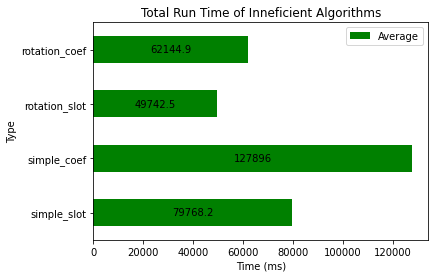

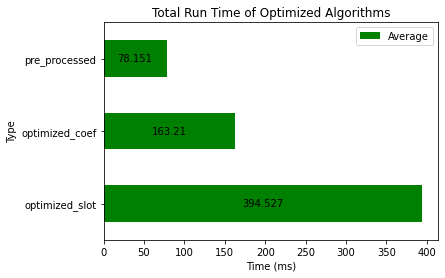

In [9]:
ax = total_time_averages[total_time_averages['Average'] > 1000].plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Total Run Time of Inneficient Algorithms')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

ax = total_time_averages[total_time_averages['Average'] < 1000].plot.barh(x='Type', color='green', title='Total Run Time of Optimized Algorithms')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

In [10]:
total_time_averages

,Type,Average
0,simple_slot,79768.200
1,simple_coef,127895.600
2,optimized_slot,394.527
3,optimized_coef,163.210
4,rotation_slot,49742.500
5,rotation_coef,62144.900
6,pre_processed,78.151


In [11]:
# Compare Simple Slot vs Simple Coef
simple_slot_vs_coef = format(compare_two_types_by_percentage("simple_slot", "simple_coef", total_time_averages),
                             ".2f")

# Compare Rotation Slot vs Rotation Coef
rotation_slot_vs_coef = format(compare_two_types_by_percentage("rotation_slot", "rotation_coef", total_time_averages),
                               ".2f")

# Compare Optimized Coef vs normal coef
optimized_coef_vs_coef = format(compare_two_types_by_percentage("optimized_coef", "rotation_coef", total_time_averages),
                                ".2f")

# Compare Optimized Coef vs normal coef
optimized_slot_vs_slot = format(compare_two_types_by_percentage("optimized_slot", "rotation_slot", total_time_averages),
                                ".2f")

# Compare Optimized Rotation Slot vs Optimized Rotation Coef
optimized_coef_vs_slot = format(compare_two_types_by_percentage("optimized_coef", "optimized_slot", total_time_averages),
                                ".2f")

# Compare Pre Processed Coef vs Optimized Rotation Coef
pre_proc_vs_opt_coef = format(compare_two_types_by_percentage("pre_processed", "optimized_coef", total_time_averages),
                              ".2f")

# Compare Pre Processed Coef vs Optimized Rotation Slot
pre_proc_vs_opt_slot = format(compare_two_types_by_percentage("pre_processed", "optimized_slot", total_time_averages),
                              ".2f")

### Time per phase

I divided the algorithms in 5 phases: setup, encryption, homomorphic operations, decryption, plaintext operations.

The Setup Time includes the time it takes to generate all the parameters needed, generate the rotation keys needed, and the time it takes to pre process the values.

The Encryption is the time it takes to encrypt all the needed ciphertexts.

The Homomorphic Operation is the time it takes to execute all the homomorphic operations needed.

The Decryption is the time it takes to decrypt all the ciphertexts. Since we end up only decrypting one ciphertext, I don't use time for comparison.

The Plaintext Operation is the time it takes to execute all the operations over plaintexts. This is also not gonna be used because i would only do, at most, 1 plaintext operation and since it is plaintext it is the always the same value (it is not influenced by homomorphic scheme or packing type)

In [12]:
### Create a DataFrame for each phase with the average of each type of algorithm

# Setup
setup_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    setup_averages.loc[len(setup_averages)] = {'Type': name, 'Average': df[' setup'].mean()}

# Encryption
encryption_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    encryption_averages.loc[len(encryption_averages)] = {'Type': name, 'Average': df[' encryption'].mean()}

# Homomorphic
homomorphic_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    homomorphic_averages.loc[len(homomorphic_averages)] = {'Type': name, 'Average': df[' homomorphic'].mean()}

<AxesSubplot:ylabel='Time'>

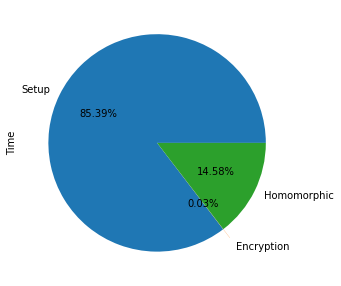

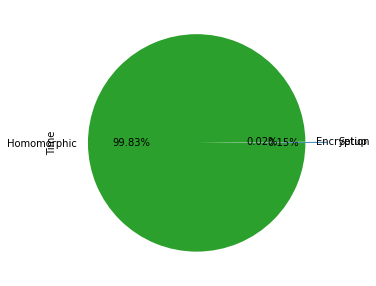

In [13]:
# Rotation Coef
rotation_coef_averages_df = create_df_for_type('rotation_coef', setup_averages, encryption_averages, homomorphic_averages)
rotation_slot_averages_df = create_df_for_type('rotation_slot', setup_averages, encryption_averages, homomorphic_averages)

rotation_coef_averages_df.plot.pie(y='Time', figsize=(5, 5), legend=False, autopct='%1.2f%%', explode=(0, 0.1, 0),)
rotation_slot_averages_df.plot.pie(y='Time', figsize=(5, 5), legend=False, autopct='%1.2f%%', explode=(0.2, 0, 0),)


In [14]:
# Setup Operations Comparison
# Optimized Coef vs Optimized Slot
setup_opt_coef_vs_opt_slot = format(compare_two_types_by_percentage("optimized_coef", "optimized_slot", setup_averages),
                              ".2f")
# Optimized Coef vs Coef
setup_opt_coef_vs_coef = format(compare_two_types_by_percentage("optimized_coef", "rotation_coef", setup_averages),
                              ".2f")
# Slot vs Optimized Slot
setup_slot_vs_opt_slot = format(compare_two_types_by_percentage("rotation_slot", "optimized_slot", setup_averages),
                              ".2f")
# Coef vs Slot
setup_slot_vs_coef = format(compare_two_types_by_percentage("rotation_slot", "rotation_coef", setup_averages),
                              ".2f")
# Compare Pre Processed Coef vs Optimized Rotation Slot
setup_pre_proc_vs_opt_slot = format(compare_two_types_by_percentage("pre_processed", "optimized_slot", setup_averages),
                              ".2f")
# Compare Pre Processed Coef vs Optimized Rotation Coef
setup_pre_proc_vs_opt_coef = format(compare_two_types_by_percentage("pre_processed", "optimized_coef", setup_averages),
                              ".2f")

# Encryption Operations Comparison
# Compare Simple Slot vs Simple Coef
simple_slot_vs_rot = format(compare_two_types_by_percentage("simple_slot", "rotation_slot", total_time_averages),
                             ".2f")
simple_slot_vs_opt = format(compare_two_types_by_percentage("simple_slot", "optimized_slot", total_time_averages),
                             ".2f")

slot_encryption_mean = (float(simple_slot_vs_rot) + float(simple_slot_vs_opt)) / 2

simple_coef_vs_rot = format(compare_two_types_by_percentage("simple_coef", "rotation_coef", total_time_averages),
                             ".2f")
simple_coef_vs_opt = format(compare_two_types_by_percentage("simple_coef", "optimized_coef", total_time_averages),
                             ".2f")
simple_coef_vs_pre = format(compare_two_types_by_percentage("simple_coef", "pre_processed", total_time_averages),
                             ".2f")

slot_encryption_mean = (float(simple_slot_vs_rot) + float(simple_slot_vs_opt) + float(simple_coef_vs_pre)) / 3

# Homomorphic Operations Comparison
# Optimized Coef vs Optimized Slot
homomorphic_opt_coef_vs_opt_slot = format(compare_two_types_by_percentage("optimized_coef", "optimized_slot", homomorphic_averages),
                              ".2f")
# Optimized Coef vs Coef
homomorphic_opt_coef_vs_coef = format(compare_two_types_by_percentage("optimized_coef", "rotation_coef", homomorphic_averages),
                              ".2f")
# Optimized Slot vs Slot
homomorphic_opt_slot_vs_slot = format(compare_two_types_by_percentage("optimized_slot", "rotation_slot", homomorphic_averages),
                              ".2f")
# Slot vs Coef
homomorphic_coef_vs_slot = format(compare_two_types_by_percentage("rotation_coef", "rotation_slot", homomorphic_averages),
                              ".2f")


Coefficient Rotation Setup Duration: 53067.1 ms
Simple Slot Encryption Duration: 75760.2 ms
Simple Coef Encryption Duration: 124346.8 ms


[Text(45, 0, '79.971'), Text(45, 0, '13.174'), Text(45, 0, '0.067')]

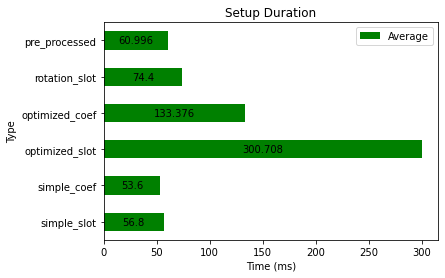

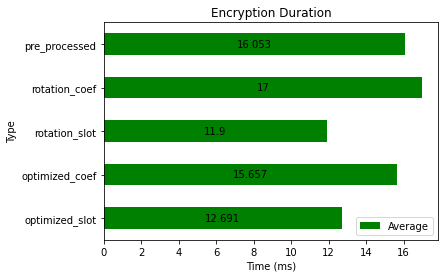

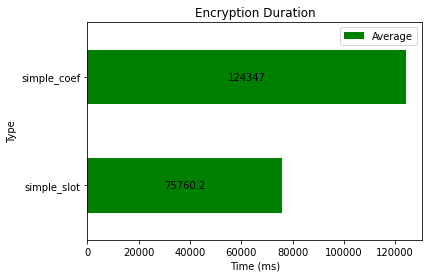

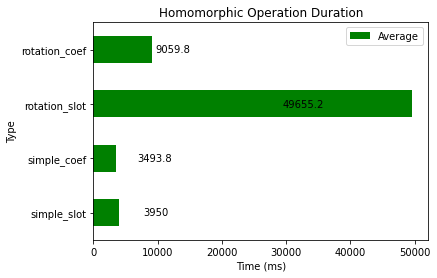

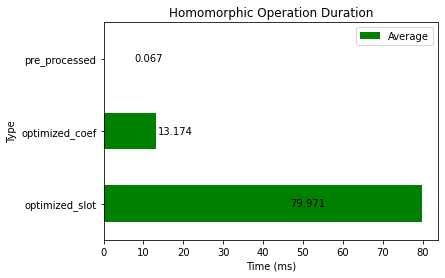

In [17]:
### Plot a graph for each phase

# Setup
ax = setup_averages[setup_averages['Average'] < 1000].plot.barh(x='Type', color='green', title='Setup Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

print("Coefficient Rotation Setup Duration: " + str(setup_averages.loc[5]['Average']) + " ms")

# Encryption
ax = encryption_averages[encryption_averages['Average'] < 1000].plot.barh(x='Type', color='green', title='Encryption Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

ax = encryption_averages[encryption_averages['Average'] > 1000].plot.barh(x='Type', ylabel='Time (ms)' , color='green', title='Encryption Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

print("Simple Slot Encryption Duration: " + str(encryption_averages.loc[0]['Average']) + " ms")
print("Simple Coef Encryption Duration: " + str(encryption_averages.loc[1]['Average']) + " ms")

# Homomorphic
# Needs two graphs because the values ara in a huge range
ax = homomorphic_averages[homomorphic_averages['Average'] > 1000].plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Homomorphic Operation Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center', padding=50)

ax = homomorphic_averages[homomorphic_averages['Average'] < 1000].plot.barh(x='Type', color='green', title='Homomorphic Operation Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center', padding=45)

In [16]:
print("Total Time:")
print("Simple Slot vs Simple Coef: " + str(simple_slot_vs_coef) + "%")
print("Rotation Slot vs Rotation Coef: " + str(rotation_slot_vs_coef) + "%")
print("Opt Coef vs Opt Slot " + str(optimized_coef_vs_slot) + "%")
print("Opt Coef vs Rotation Coef " + str(optimized_coef_vs_coef) + "%")
print("Opt Slot vs Rotation Slot  " + str(optimized_slot_vs_slot) + "%")
print("Pre proc vs Opt Coef " + str(pre_proc_vs_opt_coef) + "%")
print("Pre proc vs Opt Slot " + str(pre_proc_vs_opt_slot) + "%")

print("\nSetup:")
print("Slot vs Optimzied slot: " + str(setup_slot_vs_opt_slot) + "%")
print("Pre Proc vs Opt Coef: " + str(setup_pre_proc_vs_opt_coef) + "%")
print("Pre Proc vs Opt Slot: " + str(setup_pre_proc_vs_opt_slot) + "%")
print("opt coef vs opt slot: " + setup_opt_coef_vs_opt_slot + "%")

print("\nHomomorphic Operations:")
print("Opt Coef vs Opt Slot: " + str(homomorphic_opt_coef_vs_opt_slot) + "%")
print("Opt Coef vs Normal Coef: " + str(homomorphic_opt_coef_vs_coef) + "%")
print("Opt Slot vs Normal Slot: " + str(homomorphic_opt_slot_vs_slot) + "%")
print("Normal Coef vs Normal Slot:" + str(homomorphic_coef_vs_slot) + "%")



Total Time:
Simple Slot vs Simple Coef: 37.63%
Rotation Slot vs Rotation Coef: 19.96%
Opt Coef vs Opt Slot 58.63%
Opt Coef vs Rotation Coef 99.74%
Opt Slot vs Rotation Slot  99.21%
Pre proc vs Opt Coef 52.12%
Pre proc vs Opt Slot 80.19%

Setup:
Slot vs Optimzied slot: 75.26%
Pre Proc vs Opt Coef: 54.27%
Pre Proc vs Opt Slot: 79.72%
opt coef vs opt slot: 55.65%

Homomorphic Operations:
Opt Coef vs Opt Slot: 83.53%
Opt Coef vs Normal Coef: 99.85%
Opt Slot vs Normal Slot: 99.84%
Normal Coef vs Normal Slot:81.75%


### Conclusion

As expected the simple implementation is the worse in terms of time perfomance. Although homomorphic operations are very fast, the fact that we have to encrypt n ciphertexts makes it impratical for every application.

The rotation implementation sees an improvement but it continues to be too slow to be used in real applications. Coeffcient packing has the disadvantage that we need to create n plaintexts (one for each rotation) and the Slot packing has the disadvantage that we have to do 2*n operations, which are very time consuming.
Both the simple implementation and the rotation implementation (without optimization) are faster when using slot packing.

The optimization implemented consisted of reducing the rotation needed from n to log2(n). This gave an improvement to both the coefficient and the slot packing implementation.
As expected, the time for the homomorphic operations decreased drastically. In the coefficient implementation we saw a improvement of 99,85% and in the slot packing implementation we saw an improvement of 99,84%. ´
The drawback appeared only in the slot implementation, where the setup time was, almost, 5 times slower. This is due to the fact that in the normal implementation we only had to generate 1 evaluation key while for the optimization we needed log2(n) keys. Even with this drawback, the optimization gives an enormous improvement.

This optimization makes it worth it to use coefficient packing since it gives an improvement of 83,53% in terms of the times it takes to do operations. This translates to the coefficient packing being, overall, 58,63% faster than the slot counter part.

In terms of time perfomance the best algorithm is the one that uses coefficient packing with pre-processing before starting the operations. 
This is what was expected since this cuts the homomorphic operation from 2 * log2(n) to 1. 
The main drawback is the need to pre processed all the numbers before encryption but, as we can see by the Setup graph, it is still 79,72% faster than generating the rotation evaluation keys and 54,27% faster than generating all the plaintexts needed to do the coefficient rotations. 
The other drawback is the need to generate one more plaintext for the multiplication.
All this drawback allow us to only do one homomorphic operation that translates into this implementation being 196x faster, in terms of homomorphic operations duration, than the optimized coefficient implementation and 1193x faster than optimized slot implementation.
In terms of overall perfomance, it is 52,12% faster than the optimized coefficient implementation and 80,19% faster than the optimized slot implementation.
